#### Q1. Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [36]:
df = pd.read_excel('ENB2012_data.xlsx')

In [37]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


The dataset has 768 entries and 10 columns.

X1 to X8: Attributes related to building.
Y1 (Heating Load) and Y2 (Cooling Load)

We can see it has no missing data

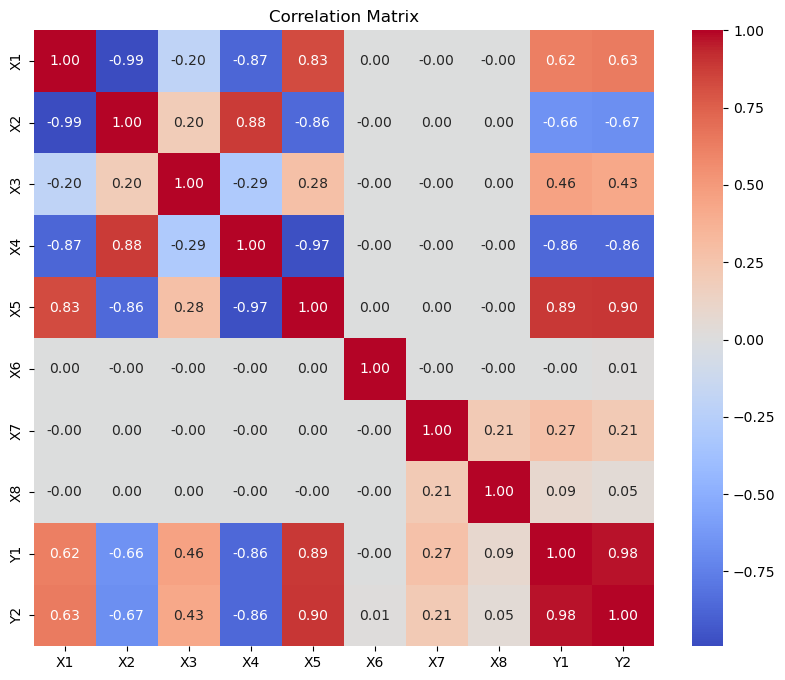

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [38]:
corr_mat = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

df.describe()

##### Strong correlations are visible between some attributes and the target variables:


- X1 (Wall area), X3 (Roof area) and X5 show moderate to high correlations with Y1 (Heating Load).
- Other variables, such as X2 and X4 (Overall height) can be dropped

In [39]:
df.drop(['X2','X4'], axis = 1)

,X1,X3,X5,X6,X7,X8,Y1,Y2
0,0.98,294.0,7.0,2,0.0,0,15.55,21.33
1,0.98,294.0,7.0,3,0.0,0,15.55,21.33
2,0.98,294.0,7.0,4,0.0,0,15.55,21.33
3,0.98,294.0,7.0,5,0.0,0,15.55,21.33
4,0.90,318.5,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...
763,0.64,343.0,3.5,5,0.4,5,17.88,21.40
764,0.62,367.5,3.5,2,0.4,5,16.54,16.88
765,0.62,367.5,3.5,3,0.4,5,16.44,17.11
766,0.62,367.5,3.5,4,0.4,5,16.48,16.61


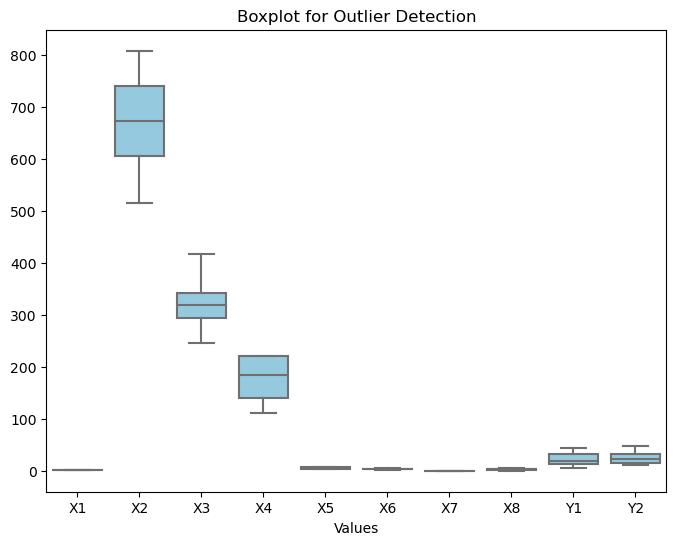

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, color='skyblue')

plt.title("Boxplot for Outlier Detection")
plt.xlabel("Values")
plt.show()

##### Split the dataset into an 80:20 ratio for training and testing using the sklearn library

In [41]:
# Define features (X) and target (y)
X = df.drop(columns=['Y1', 'Y2'])  # Drop target variables
y = df["Y1"]

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (important for Ridge and Lasso regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. 
##### Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset

In [42]:
def linear_regression(X_train ,  y_train):
    # Add intercept column to X_train
    X_train_b =  np.c_[np.ones(X_train.shape[0]), X_train]
     # Calculate coefficients using the Normal Equation
    theta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
    return theta

theta_manual = linear_regression(X_train_scaled, y_train)
print(theta_manual)

[ 2.21550326e+01 -1.37832941e+01  8.90301868e+01 -4.90560225e+01
 -1.05692411e+02  7.21546395e+00 -3.59338216e-02  2.70005138e+00
  3.27345219e-01]


In [43]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print(lr.intercept_)
print(lr.coef_)

22.155032573289894
[-6.51760118 -3.60458642  0.79533932 -3.91736677  7.21546395 -0.03593382
  2.70005138  0.32734522]


In [44]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
print(lasso_reg.intercept_)
print(lasso_reg.coef_)

22.1550325732899
[-9.20599998e-04  0.00000000e+00  2.16061688e+00 -0.00000000e+00
  8.24762122e+00 -0.00000000e+00  2.63575701e+00  2.47241646e-01]


In [45]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
print(ridge_reg.intercept_)
print(ridge_reg.coef_)

22.155032573289894
[-5.37546492 -2.84851939  0.99163525 -3.27069412  7.48142213 -0.03567924
  2.69922983  0.32868739]


##### Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models

In [46]:
y_pred_manual = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled].dot(theta_manual)
y_pred_sklearn = lr.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

In [47]:
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

In [48]:
# Evaluate manual model (from scratch)
r2_manual, mse_manual, rmse_manual = calculate_metrics(y_test, y_pred_manual)
# Evaluate sklearn models
r2_sklearn, mse_sklearn, rmse_sklearn  = calculate_metrics(y_test, y_pred_sklearn)
r2_ridge, mse_ridge, rmse_ridge  = calculate_metrics(y_test, y_pred_ridge)
r2_lasso, mse_lasso, rmse_lasso  = calculate_metrics(y_test, y_pred_lasso)

# Print results
print(f"Manual Linear Regression: R²={r2_manual:.4f}, MSE={mse_manual:.4f}, RMSE={rmse_manual:.4f} ")
print(f"Sklearn Linear Regression: R²={r2_sklearn:.4f}, MSE={mse_sklearn:.4f}, RMSE={rmse_sklearn:.4f}")
print(f"Ridge Regression: R²={r2_ridge:.4f}, MSE={mse_ridge:.4f}, RMSE={rmse_ridge:.4f} ")
print(f"Lasso Regression: R²={r2_lasso:.4f}, MSE={mse_lasso:.4f}, RMSE={rmse_lasso:.4f} ")

Manual Linear Regression: R²=0.9043, MSE=9.9726, RMSE=3.1579 
Sklearn Linear Regression: R²=0.9122, MSE=9.1532, RMSE=3.0254
Ridge Regression: R²=0.9116, MSE=9.2138, RMSE=3.0354 
Lasso Regression: R²=0.9046, MSE=9.9388, RMSE=3.1526 


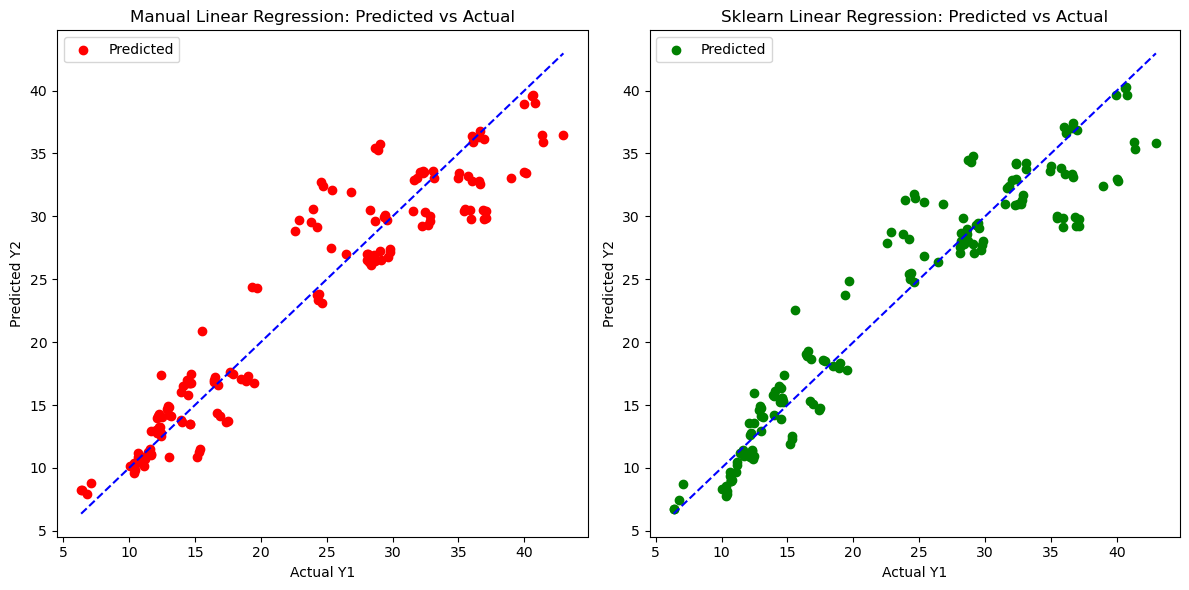

In [49]:
# Plot Predicted vs Actual for both manual and sklearn models
plt.figure(figsize=(12, 6))

# Plot for Manual Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_manual, color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')
plt.xlabel("Actual Y1")
plt.ylabel("Predicted Y2")
plt.title("Manual Linear Regression: Predicted vs Actual")
plt.legend()

# Plot for Sklearn Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, color='green', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')
plt.xlabel("Actual Y1")
plt.ylabel("Predicted Y2")
plt.title("Sklearn Linear Regression: Predicted vs Actual")
plt.legend()

plt.tight_layout()
plt.show()

Feature Importance:
     Feature  Coefficient
4  Feature 5     7.215464
6  Feature 7     2.700051
2  Feature 3     0.795339
7  Feature 8     0.327345
5  Feature 6    -0.035934
1  Feature 2    -3.604586
3  Feature 4    -3.917367
0  Feature 1    -6.517601


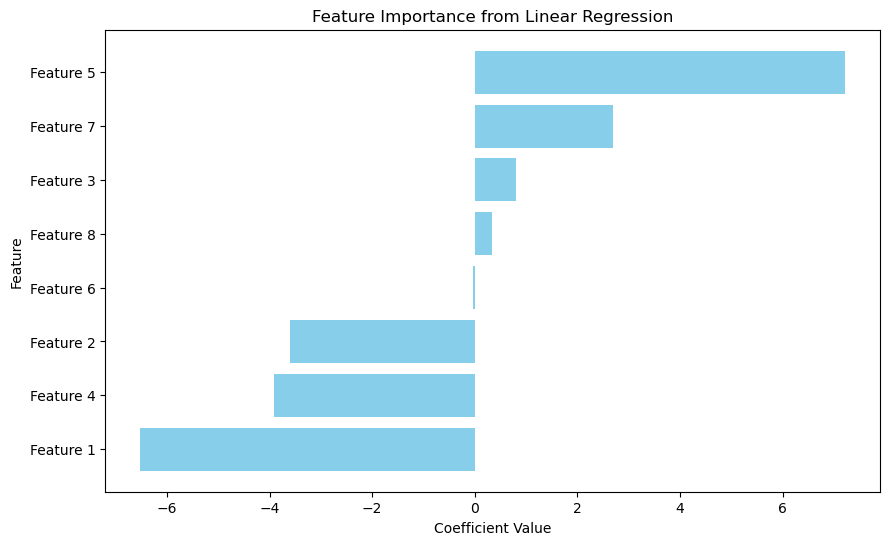

In [50]:
# Feature importance from sklearn model
feature_importance = pd.DataFrame({
    'Feature': [f'Feature {i+1}' for i in range(len(lr.coef_))],  # Generate feature names dynamically
    'Coefficient': lr.coef_
})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("Feature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### Feature 1: Relative Compactness (Negative Impact)
-Large negative coefficient indicates that more compact buildings significantly reduce heating load.
-Suggestion: Design compact structures to minimize exposed surface area and maximize energy efficiency.

### Feature 2: Surface Area (Positive Impact)
- Large positive coefficient indicates that increasing surface area dramatically increases the heating load.
- Suggestion: Optimize the surface area to reduce heat loss. Avoid designs with unnecessarily large exposed areas. Use materials with better insulation properties.
### Feature 3: Wall Area (Negative Impact)
- Large negative coefficient shows that increasing wall area with proper insulation reduces heating load.
- Suggestion: Use high R-value insulation materials for walls and ensure minimal thermal bridging.
### Feature 4: Roof Area (Negative Impact)
- Large negative coefficient suggests that proper insulation and roofing materials can reduce heating load.
- Suggestion: Install energy-efficient roofs with high thermal resistance, such as green roofs or cool roofs.